In [53]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [54]:
data = pd.read_csv('Company Stock and Investment.csv')

In [55]:
data.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [56]:
# Their is no null vlaue in the dataset

In [57]:
# Convert Month into Datetime
data['Date']=pd.to_datetime(data['Date'])

In [58]:
#Indexing with time series
data.set_index('Date',inplace=True)

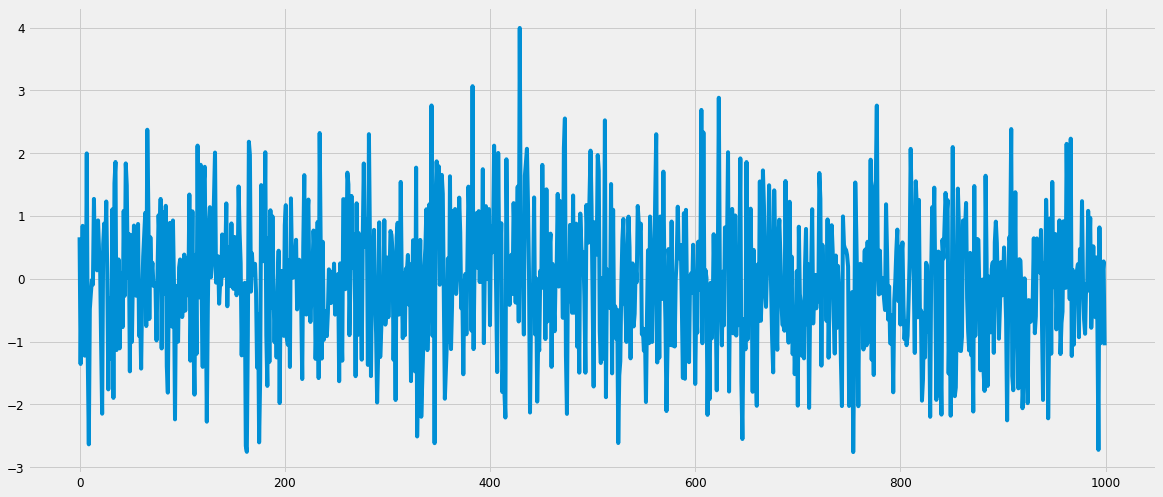

In [59]:
import numpy
import matplotlib.pyplot as plt

mean = 0
std = 1 
num_samples = 1000
samples = numpy.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

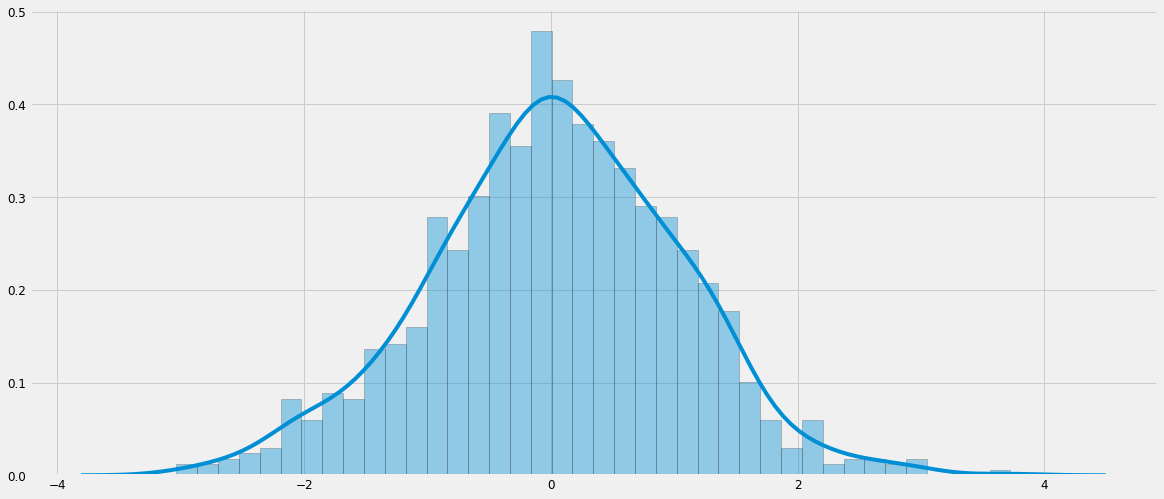

In [60]:
import numpy as np
import seaborn as sns

mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, size=1000) # 1000 samples with normal distribution

# seaborn histogram with Kernel Density Estimation
sns.distplot(s, bins=40, hist_kws={'edgecolor':'black'})

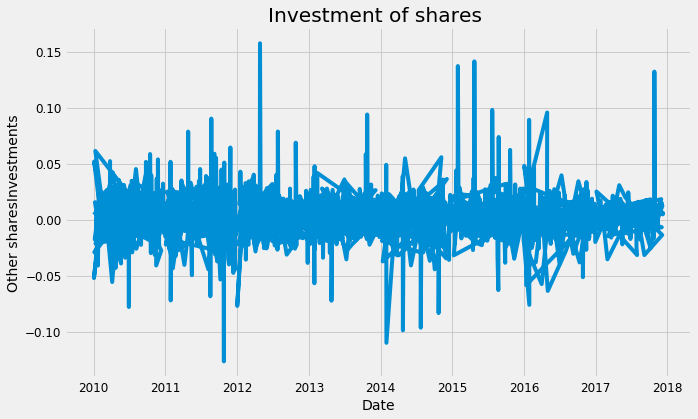

In [61]:
#Visualize the Data

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Other sharesInvestments')
plt.plot(data['Other sharesInvestments'])
plt.title('Investment of shares ')
plt.show()

In [62]:
data.describe()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


In [63]:
#Now we will check if data is stationary or not.
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [64]:
test_result=adfuller(data['Oil Investments']) # adfuller give us 5 values

In [65]:
 # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983993, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


In [66]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [67]:
adfuller_test(data['Oil Investments'])

ADF Test Statistic : -45.94216292983993
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [68]:
adfuller_test(data['Other sharesInvestments'])

ADF Test Statistic : -44.84814456404393
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [69]:
adfuller_test(data['Gold Investments'])

ADF Test Statistic : -15.906853851669037
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


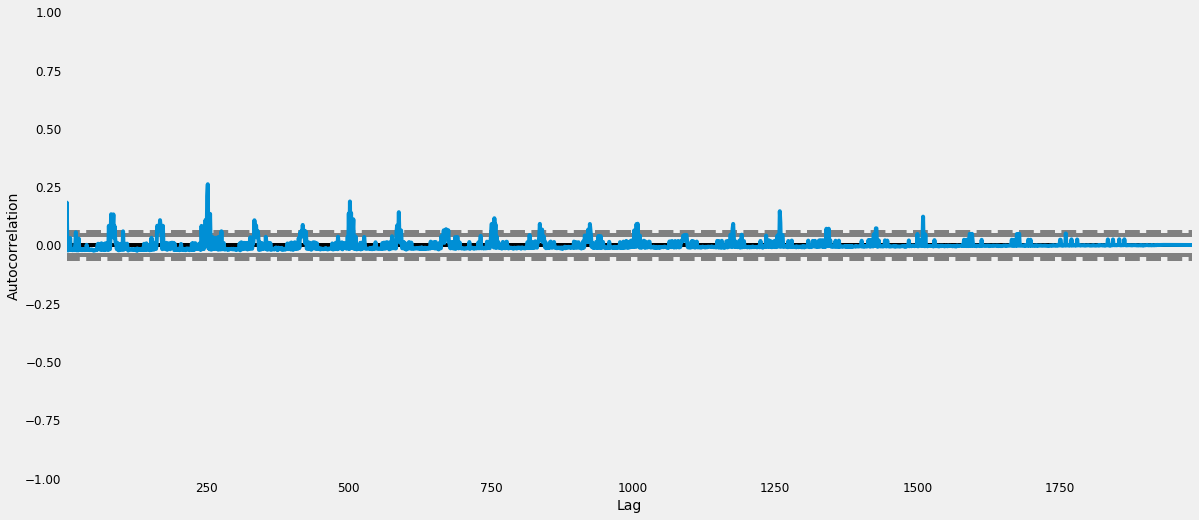

In [70]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Gold Investments'])
plt.show()

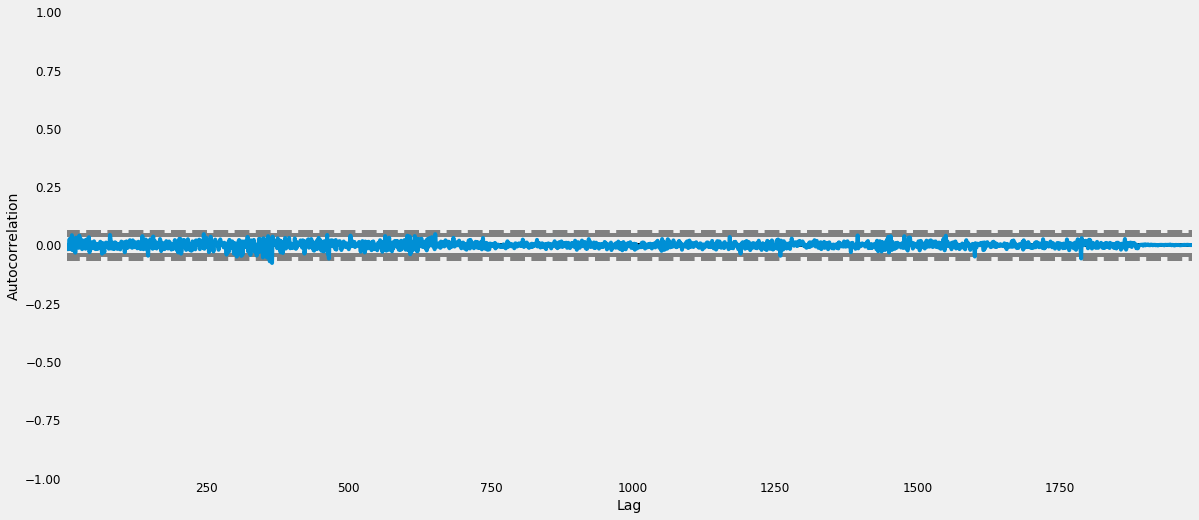

In [71]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Oil Investments'])
plt.show()

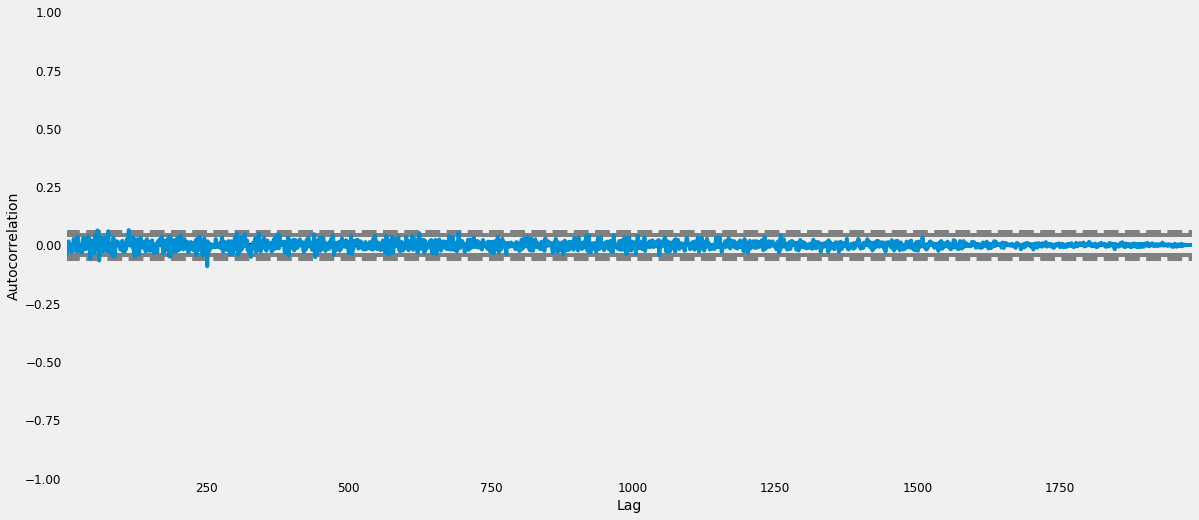

In [72]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Other sharesInvestments'])
plt.show()

In [73]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

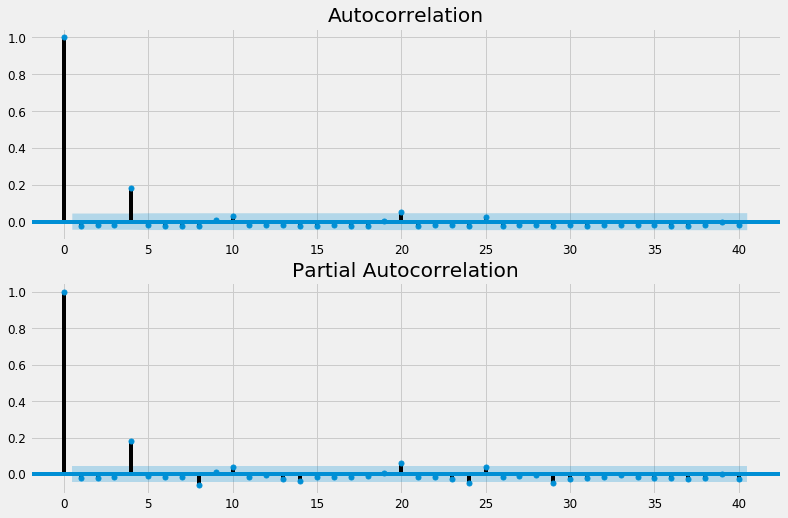

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Gold Investments'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Gold Investments'],lags=40,ax=ax2)

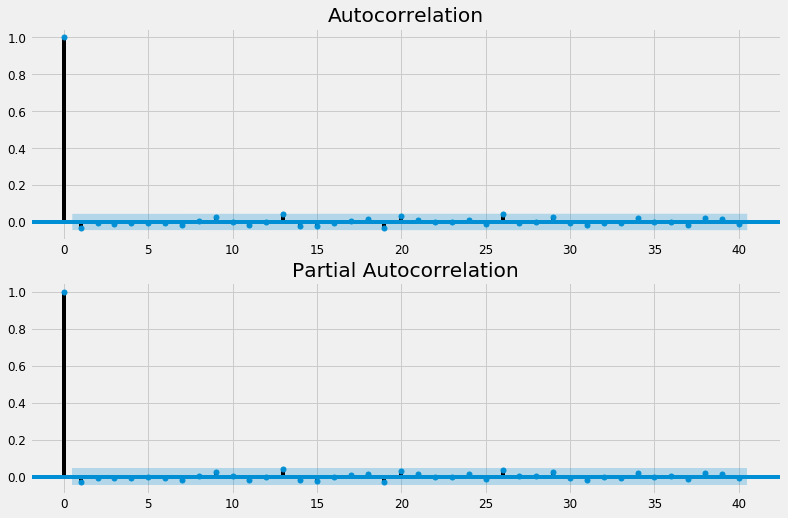

In [75]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Oil Investments'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Oil Investments'],lags=40,ax=ax2)

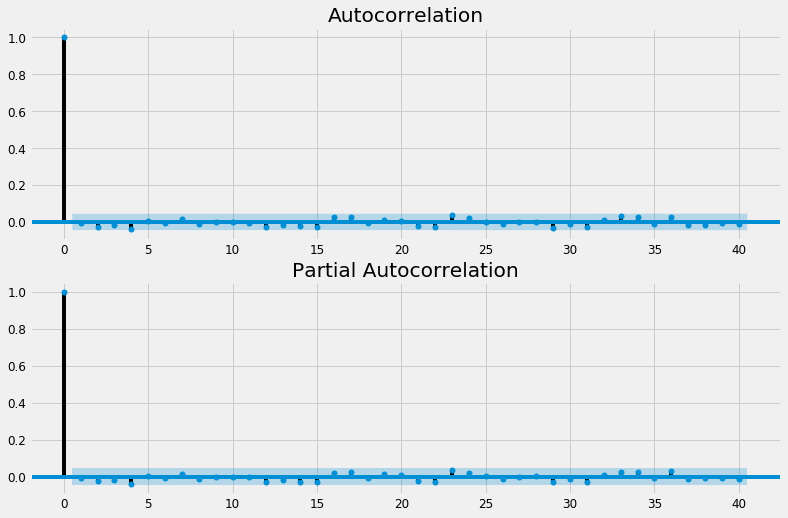

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Other sharesInvestments'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Other sharesInvestments'],lags=40,ax=ax2)

In [77]:
y = data['Oil Investments'].resample('MS').mean()

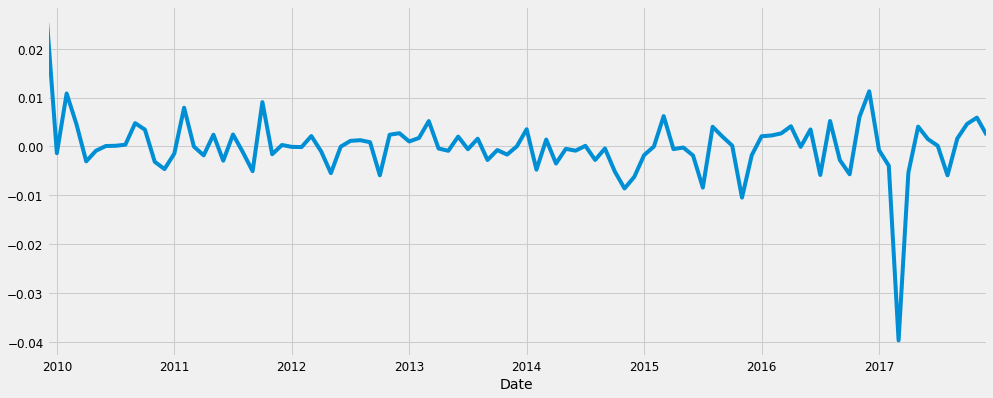

In [78]:
y.plot(figsize=(15, 6))
plt.show()

 visualize the data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

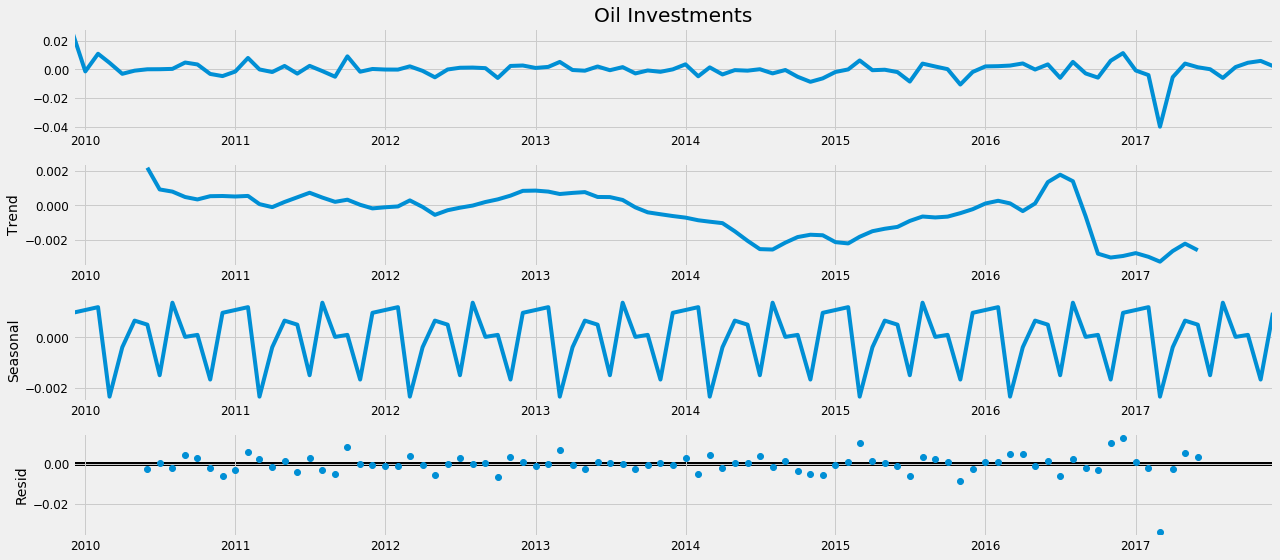

In [79]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [80]:
#Time series forecasting with ARIMA

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [81]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-719.7570794006787
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-622.8790799224995
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-592.8336194774479
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-507.2088400035655
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-630.506915345406
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-622.0672861951026
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-510.4041522389782
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-500.28028682061506
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-712.0090840579237
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-614.4291441015109
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-584.3044162297008
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-499.38858217904135
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-630.409612947416
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-612.885801385124
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-510.4184604081854
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-492.39841692055097
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-660.3537831673653
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-568.745809

In [82]:
#Fitting the ARIMA model

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1802      0.222      0.814      0.416      -0.254       0.614
ma.L1         -1.0029      0.834     -1.203      0.229      -2.637       0.631
ar.S.L12      -0.3527      0.300     -1.176      0.240      -0.940       0.235
ma.S.L12      -0.0971      0.405     -0.240      0.811      -0.891       0.697
sigma2      4.961e-05   3.94e-05      1.258      0.208   -2.77e-05       0.000


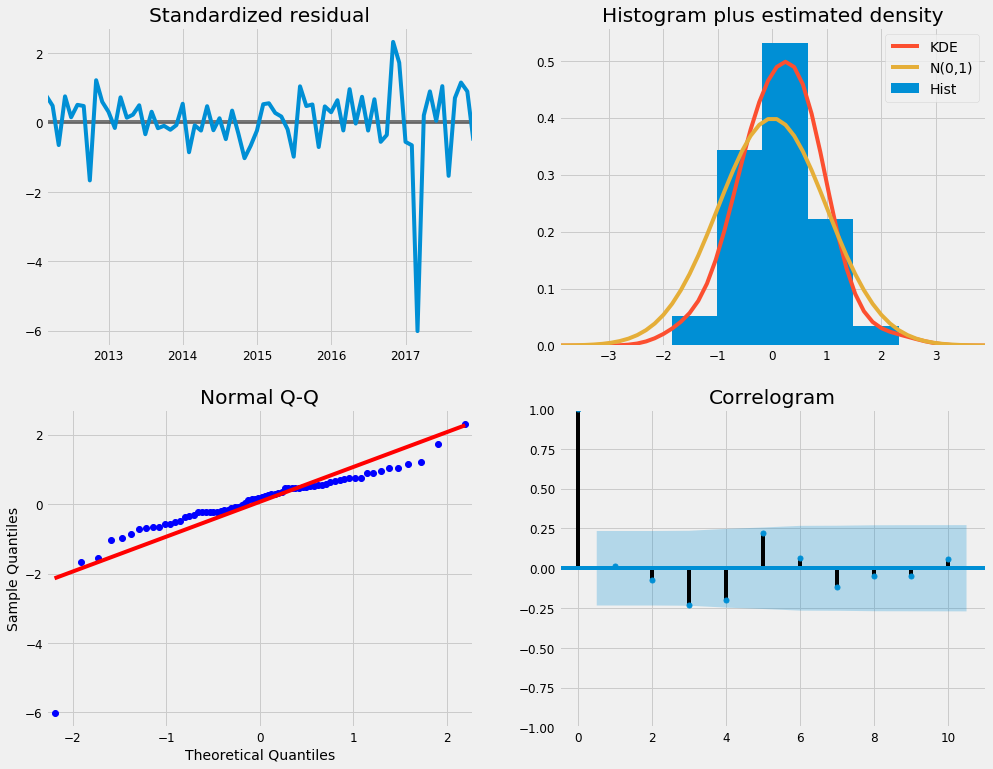

In [83]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

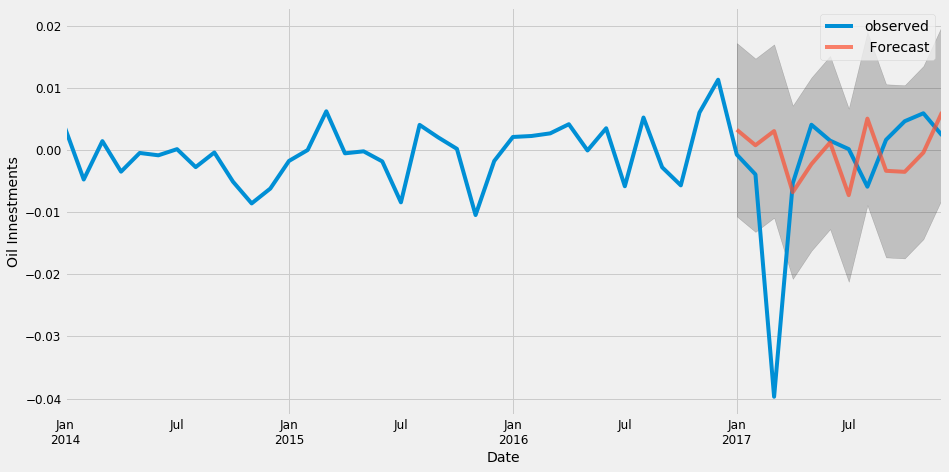

In [84]:
#Validating forecasts

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label=' Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Innestments')
plt.legend()
plt.show()

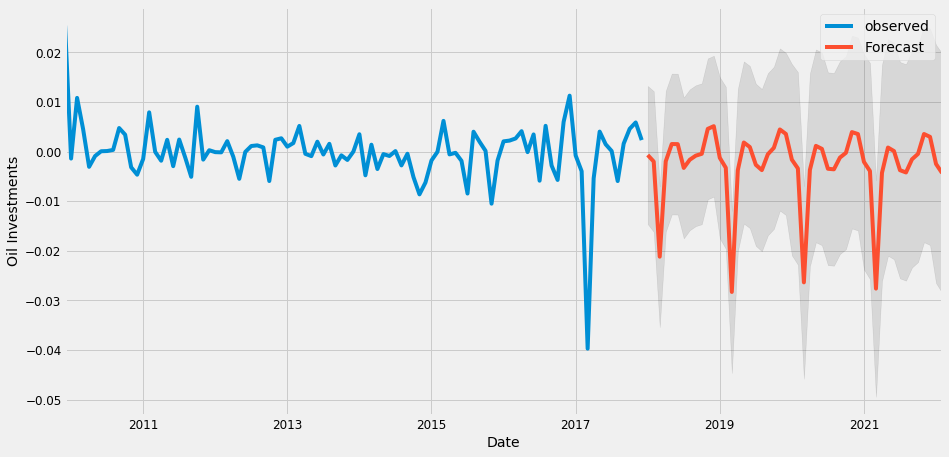

In [85]:
#Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.10)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Investments')
plt.legend()
plt.show()

In [86]:
x = data['Gold Investments'].resample('MS').mean()

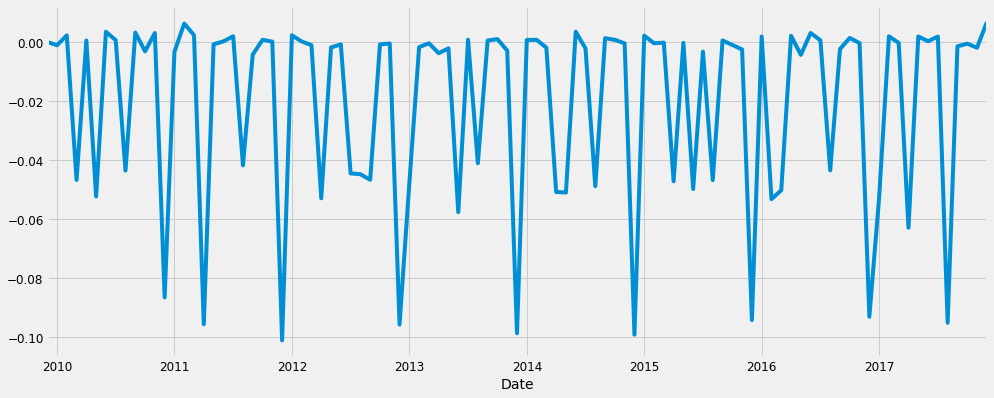

In [87]:
x.plot(figsize=(15, 6))
plt.show()

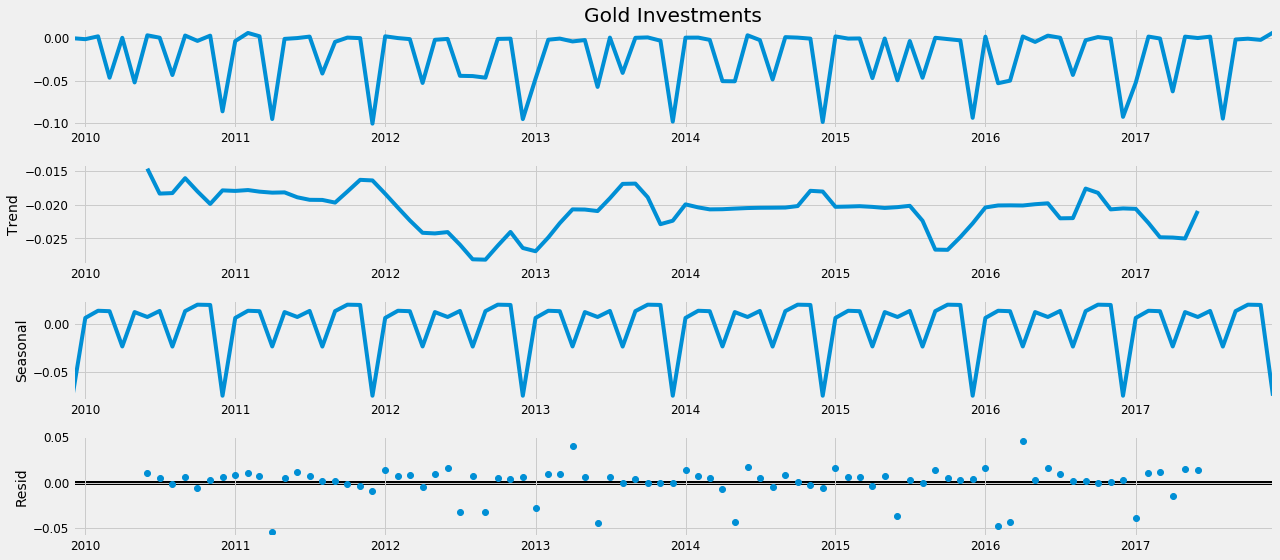

In [88]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
plt.show()

In [89]:
#Time series forecasting with ARIMA

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [90]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-719.7570794006787
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-622.8790799224995
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-592.8336194774479
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-507.2088400035655
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-630.506915345406
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-622.0672861951026
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-510.4041522389782
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-500.28028682061506
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-712.0090840579237
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-614.4291441015109
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-584.3044162297008
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-499.38858217904135
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-630.409612947416
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-612.885801385124
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-510.4184604081854
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-492.39841692055097
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-660.3537831673653
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-568.745809

In [91]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1802      0.222      0.814      0.416      -0.254       0.614
ma.L1         -1.0029      0.834     -1.203      0.229      -2.637       0.631
ar.S.L12      -0.3527      0.300     -1.176      0.240      -0.940       0.235
ma.S.L12      -0.0971      0.405     -0.240      0.811      -0.891       0.697
sigma2      4.961e-05   3.94e-05      1.258      0.208   -2.77e-05       0.000


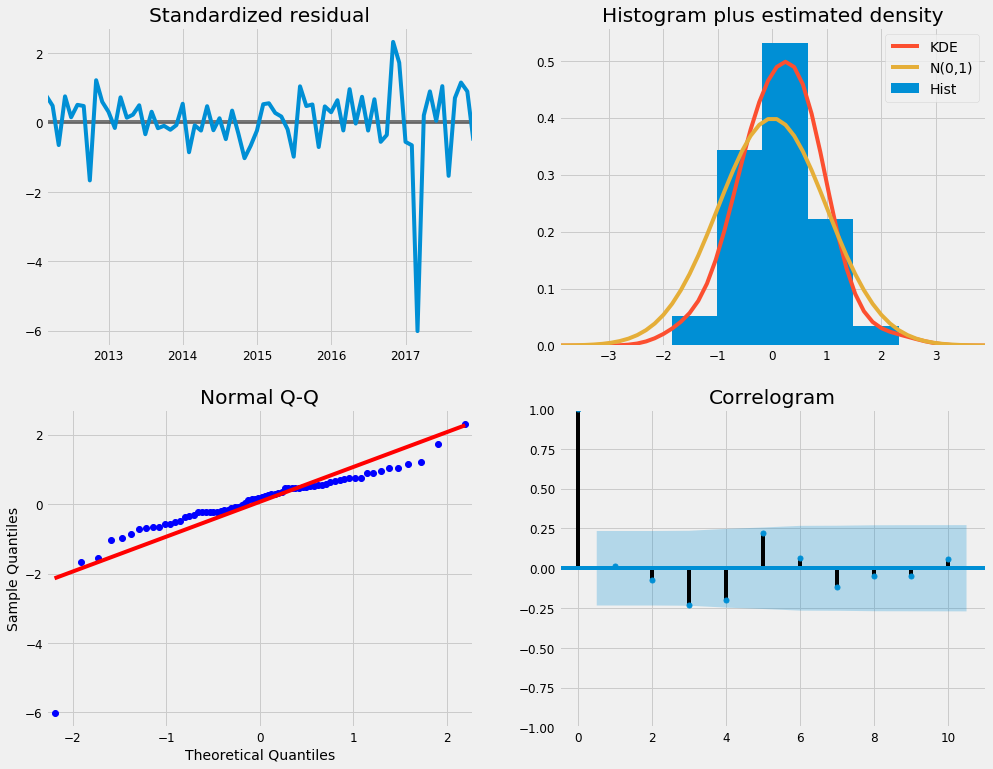

In [92]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

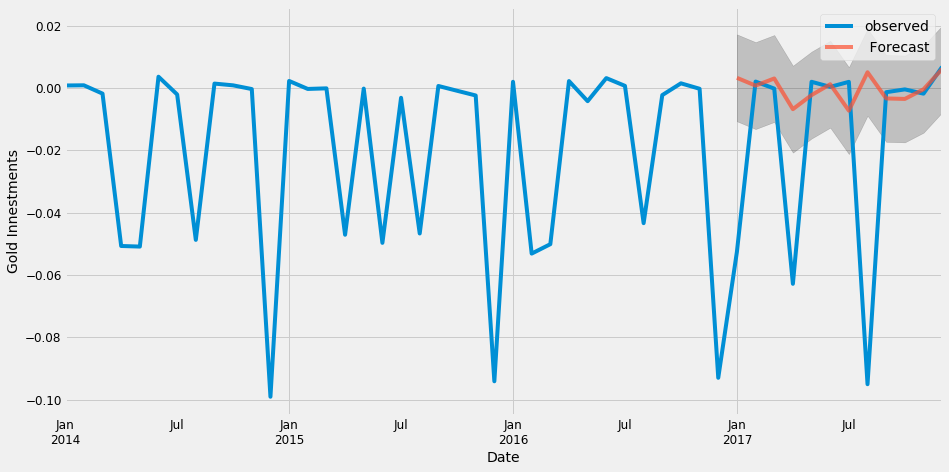

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = x['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label=' Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Gold Investments')
plt.legend()
plt.show()

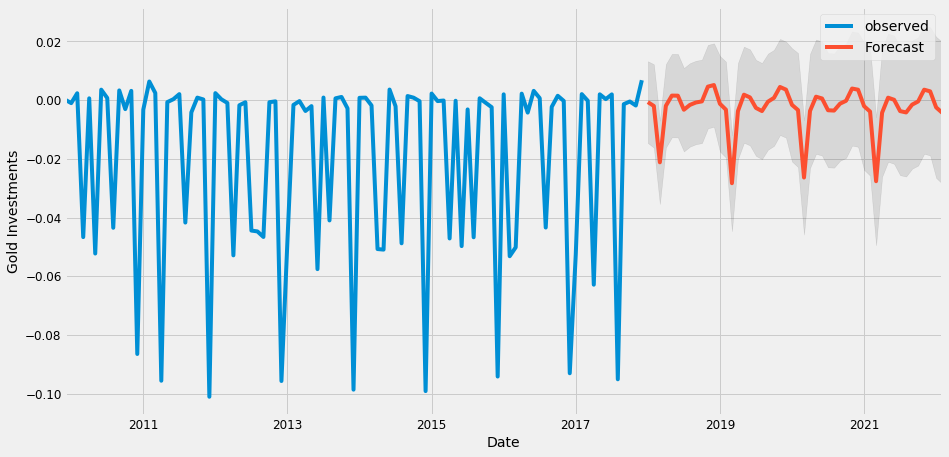

In [94]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = x.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.10)
ax.set_xlabel('Date')
ax.set_ylabel('Gold Investments')
plt.legend()
plt.show()

In [95]:
z = data['Other sharesInvestments'].resample('MS').mean()

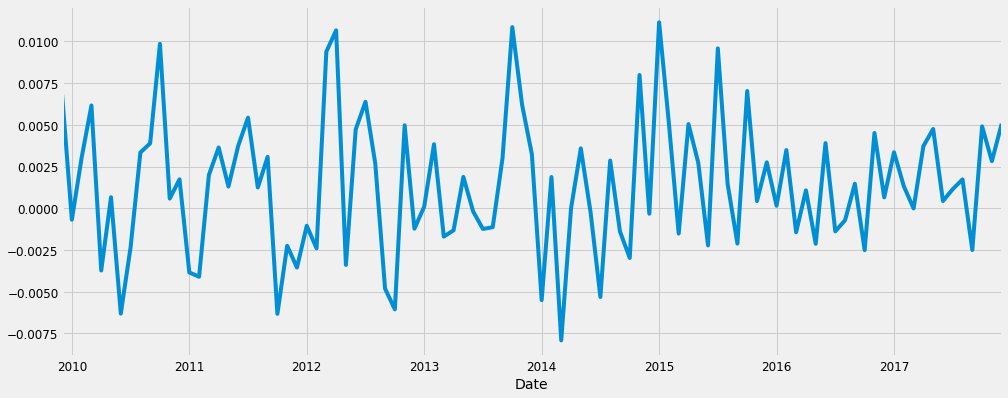

In [96]:
z.plot(figsize=(15, 6))
plt.show()

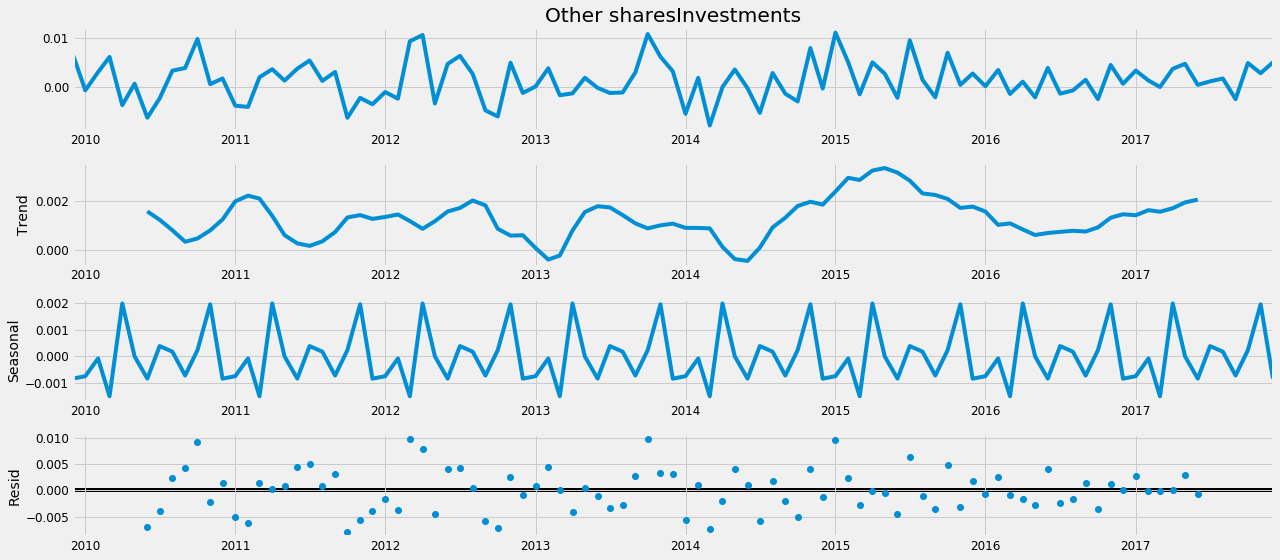

In [97]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(z, model='additive')
fig = decomposition.plot()
plt.show()

In [98]:
#Time series forecasting with ARIMA

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [99]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(z,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-774.5146496750574
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-672.7151291715048
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-609.689348482208
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-566.5553634928469
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-685.987494901816
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-675.7891025621286
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-553.2463585731653
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-563.5771794574131
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-764.8721604188959
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-664.4895050010912
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-599.657242873386
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-556.5306993084423
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-685.3509049623327
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-666.8032500107654
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-551.3799540030842
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-553.5401049364885
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-713.4216775196535
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-624.075931777

In [100]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1802      0.222      0.814      0.416      -0.254       0.614
ma.L1         -1.0029      0.834     -1.203      0.229      -2.637       0.631
ar.S.L12      -0.3527      0.300     -1.176      0.240      -0.940       0.235
ma.S.L12      -0.0971      0.405     -0.240      0.811      -0.891       0.697
sigma2      4.961e-05   3.94e-05      1.258      0.208   -2.77e-05       0.000


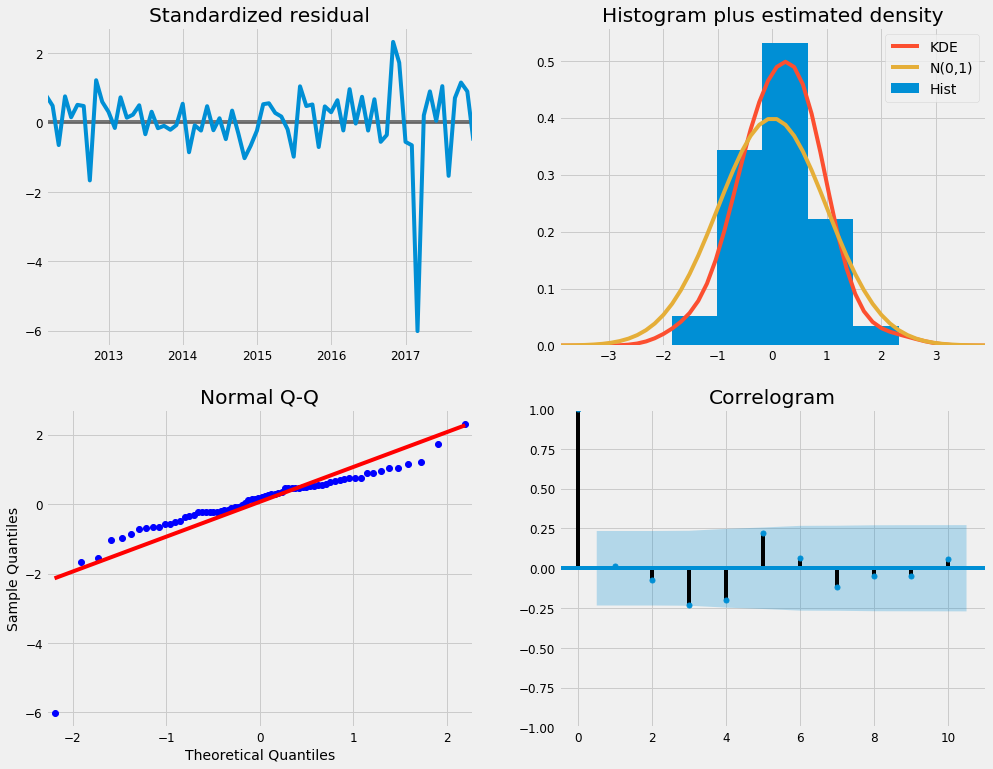

In [101]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

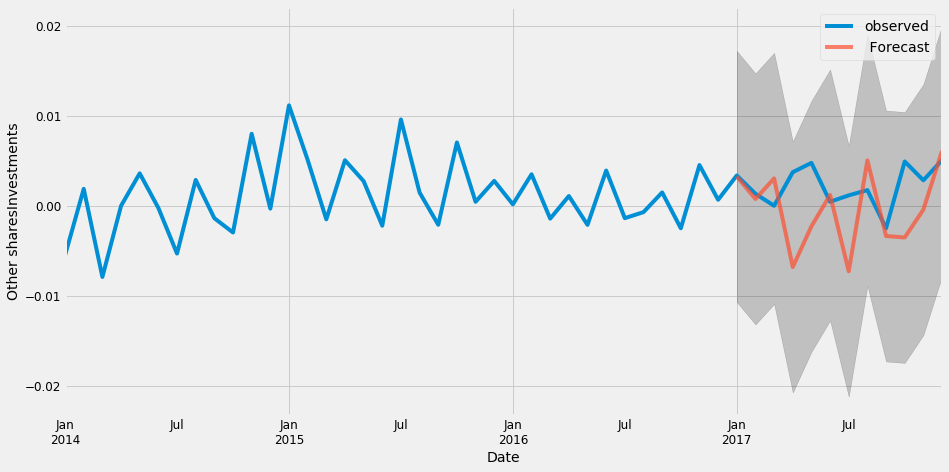

In [102]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = z['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label=' Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Other sharesInvestments')
plt.legend()
plt.show()

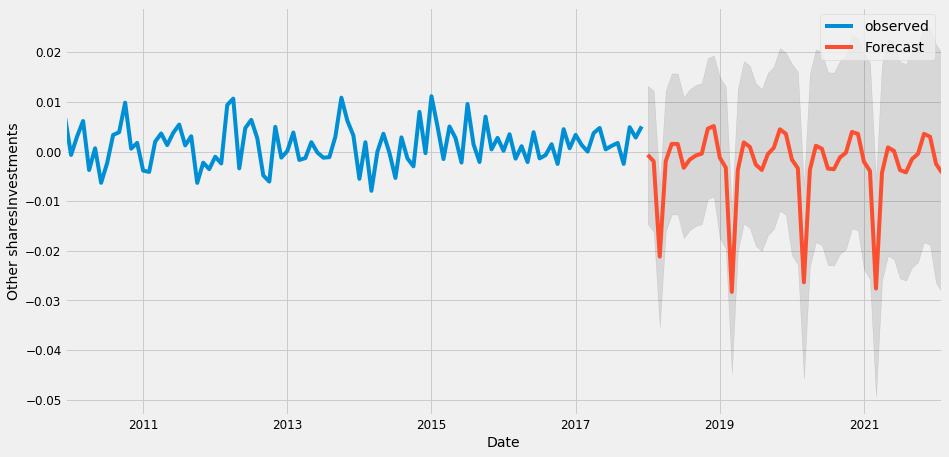

In [103]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = z.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.10)
ax.set_xlabel('Date')
ax.set_ylabel('Other sharesInvestments')
plt.legend()
plt.show()